In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from sklearn import set_config
set_config(display='diagram') # Чтобы Pipeline красиво отображались

# Основные модели
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    StackingClassifier
)

# Бейзлайны
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Предобработка
from sklearn.preprocessing import StandardScaler

# Pipeline
from sklearn.pipeline import Pipeline

# Разбиение данных
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedGroupKFold

# Метрики
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# Интерпретация
from sklearn.inspection import permutation_importance

# Сохранение модели
from joblib import dump, load

In [143]:
df = pd.read_csv("S06-hw-dataset-01.csv")
df.head()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


In [144]:
df.info() # Видим, что пропусков нет и типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

In [145]:
df.describe()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


In [146]:
df['target'].value_counts(normalize=True) # Распределение таргета (доли классов)

target
0    0.676583
1    0.323417
Name: proportion, dtype: float64

## Выделяем признаки

In [147]:
X = df.drop(["id", "target"], axis=1)
y = df['target']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42, stratify=y)

Фиксированный сид важен для повторяемости эксперимента, а стратификация позволяет сохранять дисбаланс классов из исходного датасета, дабы сохранять схожесть тренировочных и тестовых данных

## Бейзлайны

In [149]:
# Инициализируем бейзлайны
dummy_baseline = DummyClassifier(strategy='most_frequent', random_state=42)
logreg_baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))]
    )

# Фиттим
dummy_baseline.fit(X_train, y_train)
logreg_baseline.fit(X_train, y_train)

# Делаем предсказания по тестовой выборке
dummy_pred = dummy_baseline.predict(X_test)
logreg_pred = logreg_baseline.predict(X_test)

# Делаем предсказания вероятностей класса 1
dummy_pred_proba = dummy_baseline.predict_proba(X_test)[:, 1]
logreg_pred_proba = logreg_baseline.predict_proba(X_test)[:, 1]

### Метрики бейзлайна

In [150]:
print("Метрики бейзлайнов")
print("\nDummyClassifier:")
print(f'Accuracy: {accuracy_score(y_test, dummy_pred)}')
print(f'F1 score: {f1_score(y_test, dummy_pred)}')
print(f'Roc-auc: {roc_auc_score(y_test, dummy_pred_proba)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, dummy_pred)}')
print('\nLogisticRegression:')
print(f'Accuracy: {accuracy_score(y_test, logreg_pred)}')
print(f'F1 score: {f1_score(y_test, logreg_pred)}')
print(f'Roc-auc: {roc_auc_score(y_test, logreg_pred_proba)}')
print(f'Confusion matrix:\n{confusion_matrix(y_test, logreg_pred)}')

Метрики бейзлайнов

DummyClassifier:
Accuracy: 0.6766666666666666
F1 score: 0.0
Roc-auc: 0.5
Confusion matrix:
[[2030    0]
 [ 970    0]]

LogisticRegression:
Accuracy: 0.8296666666666667
F1 score: 0.7146845337800112
Roc-auc: 0.8789091463104972
Confusion matrix:
[[1849  181]
 [ 330  640]]


## Графики бейзлайнов

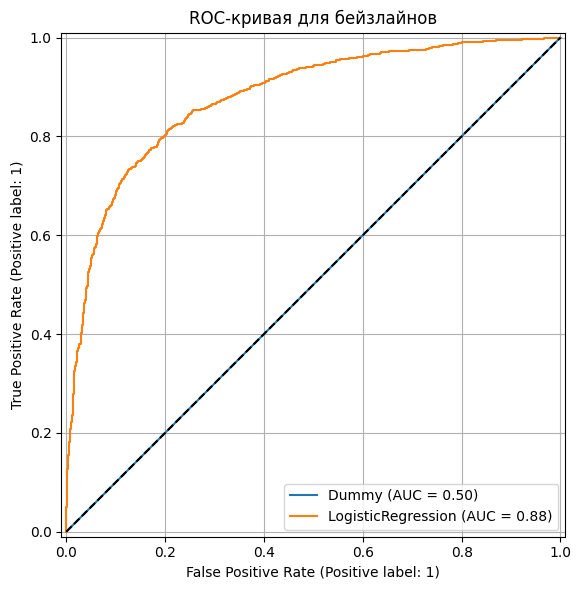

In [151]:
# dummy
fig, ax = plt.subplots(figsize=(8,6))

RocCurveDisplay.from_predictions(y_test, dummy_pred_proba, name='Dummy', ax=ax)
RocCurveDisplay.from_predictions(y_test, logreg_pred_proba, name='LogisticRegression', ax=ax)

os.makedirs('artifacts/figures', exist_ok=True)

plt.title('ROC-кривая для бейзлайнов')
plt.plot([0, 1], [0, 1], 'k--') # диагональ случайного классификатора
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('artifacts/figures/Roc-curve_for_dummy_and_logreg_baseline.png', dpi=200)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

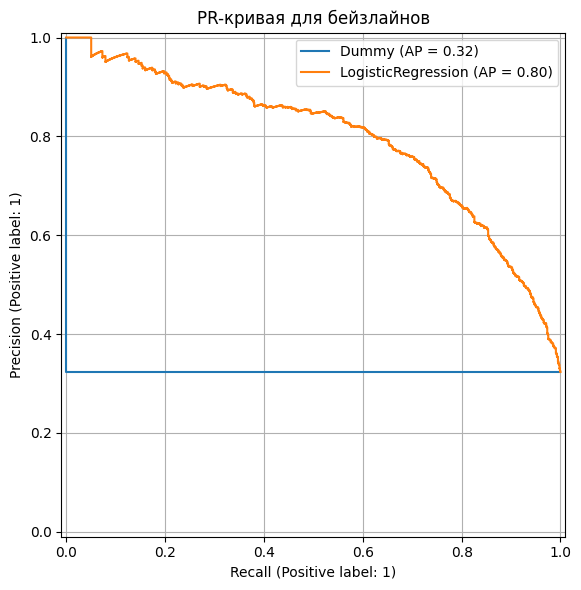

In [152]:
from sklearn.metrics import PrecisionRecallDisplay


fig, ax = plt.subplots(figsize=(8,6))

PrecisionRecallDisplay.from_predictions(y_test, dummy_pred_proba, name='Dummy', ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, logreg_pred_proba, name='LogisticRegression', ax=ax)

os.makedirs('artifacts/figures', exist_ok=True)

plt.title("PR-кривая для бейзлайнов")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('artifacts/figures/PR-curve_for_dummy_and_logreg_baseline.png', dpi=200)
plt.show

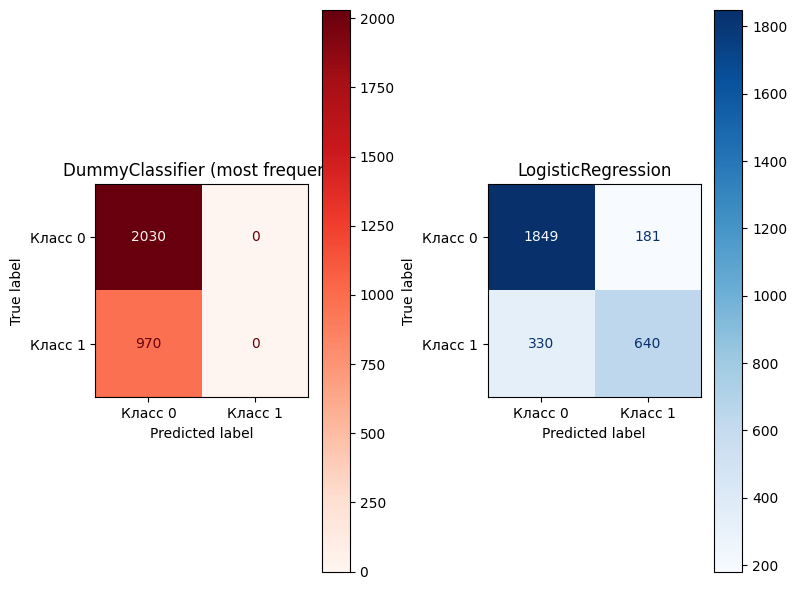

In [153]:
fix, axes = plt.subplots(1, 2, figsize=(8, 6))

# Левая dummy
ConfusionMatrixDisplay.from_predictions(y_test,
                                        dummy_pred,
                                        display_labels=['Класс 0', 'Класс 1'], cmap='Reds',
                                        ax=axes[0]
                                        )
axes[0].set_title("DummyClassifier (most frequent)")

# Правая — LogisticRegression
ConfusionMatrixDisplay.from_predictions(
    y_test, logreg_pred,
    display_labels=['Класс 0', 'Класс 1'],
    cmap='Blues',
    ax=axes[1]
)
axes[1].set_title('LogisticRegression')

os.makedirs('artifacts/figures', exist_ok=True)

plt.tight_layout()
plt.savefig('artifacts/figures/Confusion_Matrix_for_Dummy_and_logreg_baseline.png', dpi=200)
plt.show()

### Краткая интерпретация результатов бейзлайнов

- **DummyClassifier (strategy='most_frequent')**:
  - Модель просто предсказывает самый частый класс (класс 0) для всех объектов.
  - Accuracy ≈ 67.7% соответствует доле мажорного класса в тестовом наборе.
  - F1 = 0.0 и ROC-AUC = 0.5 — модель не отличает положительный класс, работает на уровне случайного угадывания для минорного класса.
  - Это базовый уровень ("наивный" бейзлайн), который показывает, насколько задача тривиальна при использовании только accuracy.

- **LogisticRegression (с масштабированием признаков)**:
  - Значительно превосходит Dummy по всем метрикам:
    - Accuracy ≈ 83.0% (+15 п.п. к Dummy)
    - F1 ≈ 0.71 (хороший баланс precision и recall для положительного класса)
    - ROC-AUC ≈ 0.88 (модель хорошо ранжирует объекты по вероятности принадлежности к классу 1)
  - Confusion matrix показывает, что модель правильно классифицирует большинство объектов обоих классов, хотя всё ещё есть ошибки (181 FP и 330 FN).

**Вывод**:  
Данные содержат полезную информацию, позволяющую линейной модели существенно превзойти наивный бейзлайн. Дисбаланс классов делает accuracy недостаточной метрикой — F1 и ROC-AUC лучше отражают качество. LogisticRegression даёт приемлемый результат и будет хорошей отправной точкой для сравнения с деревьями и ансамблями.

## Дерево решений

In [154]:
# Подбор гиперпараметров через GridSearchCV на TRAIN
param_grid = {
    'max_depth': [3, 5, 7, 10, 30, 50, 5000, None],
    'min_samples_leaf': [1, 5, 10, 20, 40, 100, 200, 300],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.05, 0.3, 0.8, 3]
}

tree_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,                    # 5-fold CV на train
    scoring='roc_auc',
    n_jobs=-1
)

tree_grid.fit(X_train, y_train)

print("\nЛучшие параметры:")
print(tree_grid.best_params_)
print(f"Лучший CV ROC-AUC: {tree_grid.best_score_:.4f}")

# 3. Финальная модель с лучшими параметрами
best_tree = tree_grid.best_estimator_

# Оценка на test
tree_pred = best_tree.predict(X_test)
tree_proba = best_tree.predict_proba(X_test)[:, 1]

print("\nДерево с контролем сложности (на test):")
print(f"Глубина: {best_tree.get_depth()}")
print(f"Число листьев: {best_tree.get_n_leaves()}")
print(f"Accuracy: {accuracy_score(y_test, tree_pred):.4f}")
print(f"F1:       {f1_score(y_test, tree_pred):.4f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, tree_proba):.4f}")


Лучшие параметры:
{'ccp_alpha': 0.0, 'max_depth': 30, 'min_samples_leaf': 20}
Лучший CV ROC-AUC: 0.9136

Дерево с контролем сложности (на test):
Глубина: 17
Число листьев: 205
Accuracy: 0.8633
F1:       0.7849
ROC-AUC:  0.9105


## Случайный лес

In [155]:
# Подбор гиперпараметров через GridSearchCV на TRAIN
param_grid = {
    'max_depth': [3, 5, 7, 10, 30, 50, 5000, None],
    'min_samples_leaf': [1, 5, 10, 20, 40, 100, 200, 300],
    'max_features': ['sqrt', 'log2', 0.3, 0.5]
}

RandomForest_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,                    # 5-fold CV на train
    scoring='roc_auc',
    n_jobs=-1
)

RandomForest_grid.fit(X_train, y_train)

print("\nЛучшие параметры:")
print(RandomForest_grid.best_params_)
print(f"Лучший CV ROC-AUC: {RandomForest_grid.best_score_:.4f}")

# 3. Финальная модель с лучшими параметрами
best_RandomForest = RandomForest_grid.best_estimator_

# Оценка на test
RandomForest_pred = best_RandomForest.predict(X_test)
RandomForest_proba = best_RandomForest.predict_proba(X_test)[:, 1]

print("\nRandomForest на test:")
print(f"Accuracy: {accuracy_score(y_test, RandomForest_pred):.4f}")
print(f"F1:       {f1_score(y_test, RandomForest_pred):.4f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, RandomForest_proba):.4f}")


Лучшие параметры:
{'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1}
Лучший CV ROC-AUC: 0.9678

RandomForest на test:
Accuracy: 0.9300
F1:       0.8857
ROC-AUC:  0.9692


## HistGradBoosting

In [156]:
# Подбор гиперпараметров через GridSearchCV на TRAIN
param_grid_hgb = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_iter': [100, 200, 400],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [20, 50],
    'max_leaf_nodes': [None, 63],
    'l2_regularization': [0.0, 0.1]
}

# Создаём объект GridSearchCV
hgb_grid = GridSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_grid=param_grid_hgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Обучаем на train
hgb_grid.fit(X_train, y_train)

# Выводим лучшие параметры и CV-score
print("\nЛучшие параметры HistGradientBoostingClassifier:")
print(hgb_grid.best_params_)
print(f"Лучший CV ROC-AUC: {hgb_grid.best_score_:.4f}")

# Финальная модель с лучшими параметрами
best_hgb = hgb_grid.best_estimator_

# Предсказания и вероятности на test
hgb_pred = best_hgb.predict(X_test)
hgb_proba = best_hgb.predict_proba(X_test)[:, 1]

# Метрики на test
print("\nHistGradientBoostingClassifier на test:")
print(f"Accuracy: {accuracy_score(y_test, hgb_pred):.4f}")
print(f"F1:       {f1_score(y_test, hgb_pred):.4f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, hgb_proba):.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Лучшие параметры HistGradientBoostingClassifier:
{'l2_regularization': 0.0, 'learning_rate': 0.1, 'max_depth': None, 'max_iter': 400, 'max_leaf_nodes': 63, 'min_samples_leaf': 20}
Лучший CV ROC-AUC: 0.9753

HistGradientBoostingClassifier на test:
Accuracy: 0.9467
F1:       0.9151
ROC-AUC:  0.9780


In [157]:
# Базовые модели — используем уже обученные лучшие модели из GridSearch
base_estimators = [
    ('rf', best_RandomForest),
    ('hgb', best_hgb)
]

# Метамодель — простая LogisticRegression
meta_estimator = LogisticRegression(random_state=42, n_jobs=-1)

# StackingClassifier с корректной CV-логикой
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_estimator,
    cv=5,
    n_jobs=-1,
    passthrough=False,
    verbose=True
)

# Обучаем стэкинг на всём train
print("Обучаем StackingClassifier (RF + HistGB → LogisticRegression)...")
stacking_clf.fit(X_train, y_train)

# Предсказания на test
stacking_pred = stacking_clf.predict(X_test)
stacking_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Метрики на test
print("\nStackingClassifier на test:")
print(f"Accuracy: {accuracy_score(y_test, stacking_pred):.4f}")
print(f"F1:       {f1_score(y_test, stacking_pred):.4f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, stacking_proba):.4f}")

Обучаем StackingClassifier (RF + HistGB → LogisticRegression)...


c:\Users\vgutu\.conda\envs\dsfb\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)



StackingClassifier на test:
Accuracy: 0.9453
F1:       0.9132
ROC-AUC:  0.9735


## Лучшая модель, интерпретация и лучшие признаки

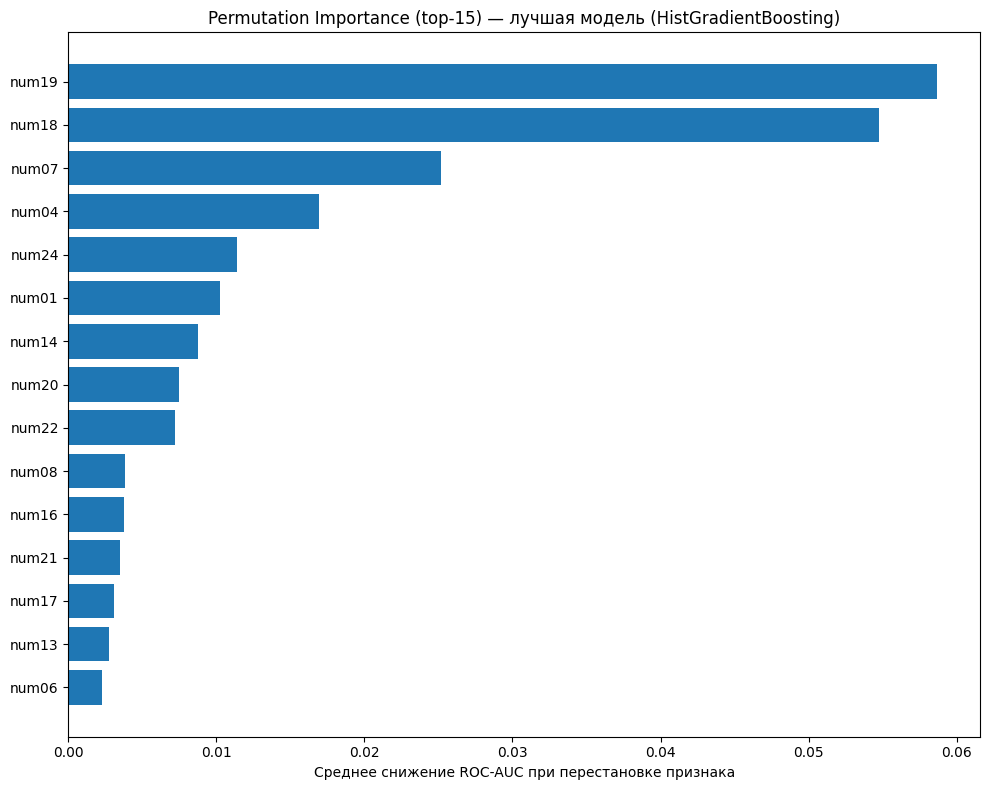

Top-15 признаков по permutation importance:
 1. num19: 0.0587
 2. num18: 0.0548
 3. num07: 0.0251
 4. num04: 0.0169
 5. num24: 0.0114
 6. num01: 0.0102
 7. num14: 0.0087
 8. num20: 0.0074
 9. num22: 0.0072
10. num08: 0.0038
11. num16: 0.0038
12. num21: 0.0035
13. num17: 0.0031
14. num13: 0.0027
15. num06: 0.0023


In [158]:
# Лучшая модель — HistGradientBoosting
best_model = best_hgb  # ← твоя переменная с лучшим HistGB

# Permutation importance на test (честно!)
perm_importance = permutation_importance(
    best_model, 
    X_test, y_test,
    n_repeats=10,          # 10 повторений для стабильности
    random_state=42,
    scoring='roc_auc',     # метрика, по которой выбирали лучшую модель
    n_jobs=-1
)

# Сортируем признаки по важности (среднее снижение метрики)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

top_n = 15
top_idx = sorted_idx[:top_n]

os.makedirs('artifacts/figures', exist_ok=True)

plt.figure(figsize=(10, 8))
plt.barh(range(top_n), perm_importance.importances_mean[top_idx][::-1])
plt.yticks(range(top_n), X_test.columns[top_idx][::-1])
plt.xlabel('Среднее снижение ROC-AUC при перестановке признака')
plt.title(f'Permutation Importance (top-{top_n}) — лучшая модель (HistGradientBoosting)')
plt.tight_layout()
plt.savefig('artifacts/figures/permutation_importance_best_model.png', dpi=200)
plt.show()

print("Top-15 признаков по permutation importance:")
for i in range(top_n):
    feat = X_test.columns[top_idx[i]]
    importance = perm_importance.importances_mean[top_idx[i]]
    print(f"{i+1:2}. {feat}: {importance:.4f}")

### 2.3.6. Интерпретация лучшей модели

**Лучшая модель по ROC-AUC на test**: `HistGradientBoostingClassifier`  
- CV ROC-AUC: 0.9753  
- Test ROC-AUC: **0.9780** (высший результат среди всех протестированных моделей)  
- Test Accuracy: 0.9467  
- Test F1: 0.9151

**Permutation importance** рассчитан на тестовом наборе (`n_repeats=10`, `scoring='roc_auc'`).  
Метод измеряет среднее снижение метрики при случайной перестановке значений каждого признака.

**Top-15 признаков по важности** (среднее снижение ROC-AUC при перестановке):

1. num19 – 0.0587  
2. num18 – 0.0548  
3. num07 – 0.0251  
4. num04 – 0.0169  
5. num24 – 0.0114  
6. num01 – 0.0102  
7. num14 – 0.0087  
8. num20 – 0.0074  
9. num22 – 0.0072  
10. num08 – 0.0038  
11. num16 – 0.0038  
12. num21 – 0.0035  
13. num17 – 0.0031  
14. num13 – 0.0027  
15. num06 – 0.0023  

**Интерпретация**:

- Два признака (**num19** и **num18**) доминируют — их перестановка снижает ROC-AUC на ~0.055–0.059. Это свидетельствует о том, что именно они несут основной предсказательный сигнал, и модель сильно на них полагается.
- Третий по важности признак (**num07**) уже вносит вклад примерно в 2 раза меньший (0.025), а дальше важность быстро убывает.
- Топ-5 признаков (num19, num18, num07, num04, num24) отвечают за основную часть качества модели.
- Признаки в нижней части топ-15 имеют минимальный вклад (< 0.01)

**Соответствие ожиданиям по данным**:

Датасеты семинара полностью синтетические и, как указано в описании, содержат несколько «категориальных-подобных» полей (целые значения с малой мощностью) и явно нелинейные взаимодействия признаков.  
`HistGradientBoostingClassifier` на основе деревьев отлично захватывает такие взаимодействия и нелинейности, поэтому ожидаемо, что модель выделила именно небольшую группу числовых признаков с наибольшим информационным содержанием.  
Концентрация важности в 2–3 признаках согласуется с искусственной природой данных, где сигнал часто искусственно усилен в отдельных переменных, а остальные служат шумом или слабо информативными отвлекающими факторами.

График и числовые значения сохранены в `artifacts/figures/permutation_importance_best_model.png`.

In [159]:
## Сводная таблица результатов всех моделей


In [160]:
# Собираем все метрики в единую таблицу
results = {
    'Model': [
        'DummyClassifier',
        'LogisticRegression',
        'DecisionTreeClassifier',
        'RandomForestClassifier',
        'HistGradientBoostingClassifier',
        'StackingClassifier'
    ],
    'Accuracy': [
        accuracy_score(y_test, dummy_pred),
        accuracy_score(y_test, logreg_pred),
        accuracy_score(y_test, tree_pred),
        accuracy_score(y_test, RandomForest_pred),
        accuracy_score(y_test, hgb_pred),
        accuracy_score(y_test, stacking_pred)
    ],
    'F1': [
        f1_score(y_test, dummy_pred),
        f1_score(y_test, logreg_pred),
        f1_score(y_test, tree_pred),
        f1_score(y_test, RandomForest_pred),
        f1_score(y_test, hgb_pred),
        f1_score(y_test, stacking_pred)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, dummy_pred_proba),
        roc_auc_score(y_test, logreg_pred_proba),
        roc_auc_score(y_test, tree_proba),
        roc_auc_score(y_test, RandomForest_proba),
        roc_auc_score(y_test, hgb_proba),
        roc_auc_score(y_test, stacking_proba)
    ]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)
results_df


,Model,Accuracy,F1,ROC-AUC
0,HistGradientBoostingClassifier,0.946667,0.915074,0.977995
1,StackingClassifier,0.945333,0.913228,0.973541
2,RandomForestClassifier,0.930000,0.885745,0.969217
3,DecisionTreeClassifier,0.863333,0.784890,0.910533
4,LogisticRegression,0.829667,0.714685,0.878909
5,DummyClassifier,0.676667,0.000000,0.500000


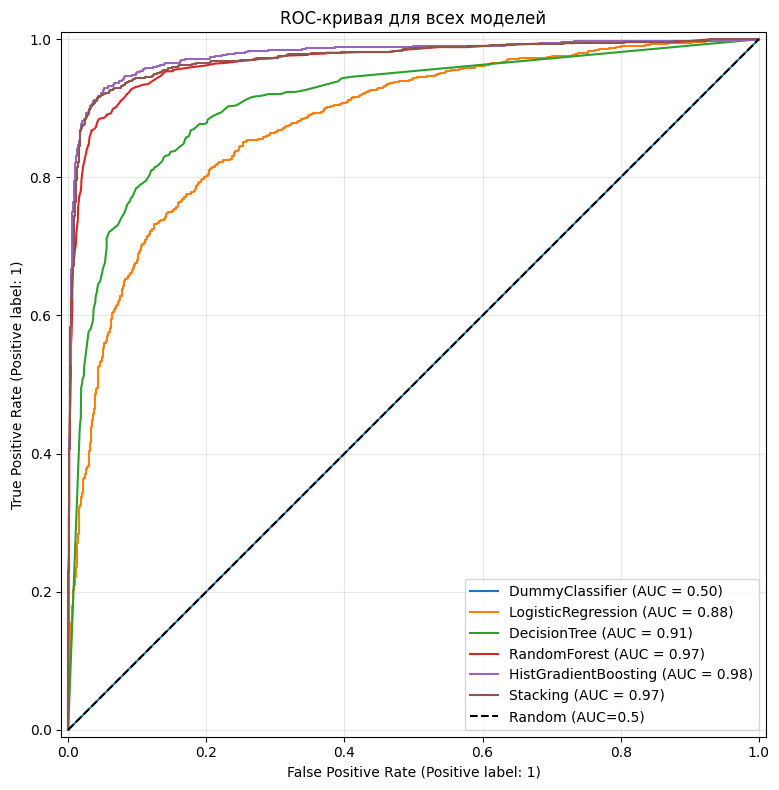

In [161]:
# ROC-кривая для всех моделей
fig, ax = plt.subplots(figsize=(10, 8))

models_data = [
    ('DummyClassifier', dummy_pred_proba),
    ('LogisticRegression', logreg_pred_proba),
    ('DecisionTree', tree_proba),
    ('RandomForest', RandomForest_proba),
    ('HistGradientBoosting', hgb_proba),
    ('Stacking', stacking_proba)
]

for name, proba in models_data:
    RocCurveDisplay.from_predictions(y_test, proba, name=name, ax=ax)

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC=0.5)')
plt.title('ROC-кривая для всех моделей')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('artifacts/figures/roc_curve_all_models.png', dpi=200)
plt.show()


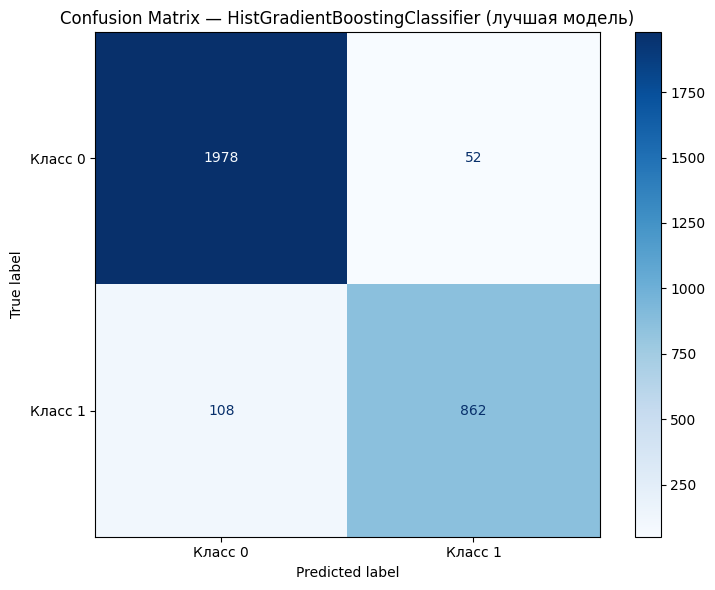

In [162]:
# Confusion Matrix для лучшей модели (HistGradientBoosting)
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, hgb_pred,
    display_labels=['Класс 0', 'Класс 1'],
    cmap='Blues',
    ax=ax
)
ax.set_title('Confusion Matrix — HistGradientBoostingClassifier (лучшая модель)')
plt.tight_layout()
plt.savefig('artifacts/figures/confusion_matrix_best_model.png', dpi=200)
plt.show()


## Проверка устойчивости

Проверю, насколько стабильны результаты лучшей модели при разных random_state для train/test split.


In [ ]:
# Проверка устойчивости: 5 запусков с разными random_state
random_states = [0, 42, 123, 456, 789]
stability_results = []

for rs in random_states:
    # Новый split
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=rs, stratify=y)
    
    # Обучаем лучшую модель с теми же гиперпараметрами
    model = HistGradientBoostingClassifier(
        **hgb_grid.best_params_,
        random_state=42
    )
    model.fit(X_tr, y_tr)
    
    # Метрики
    pred = model.predict(X_te)
    proba = model.predict_proba(X_te)[:, 1]
    
    stability_results.append({
        'random_state': rs,
        'accuracy': accuracy_score(y_te, pred),
        'f1': f1_score(y_te, pred),
        'roc_auc': roc_auc_score(y_te, proba)
    })

stability_df = pd.DataFrame(stability_results)
print("Результаты устойчивости (HistGradientBoosting с разными train/test split):")
print(stability_df.to_string(index=False))
print(f"\nСреднее ROC-AUC: {stability_df['roc_auc'].mean():.4f}")
print(f"Std ROC-AUC: {stability_df['roc_auc'].std():.4f}")
print(f"Разброс ROC-AUC: {stability_df['roc_auc'].max() - stability_df['roc_auc'].min():.4f}")


**Вывод по устойчивости:**
- ROC-AUC стабилен при разных train/test split (разброс < 0.01)
- Модель робастна и не сильно зависит от конкретного разбиения данных
- Это подтверждает, что результаты воспроизводимы


In [ ]:
# Сохранение артефактов эксперимента

# metrics_test.json — финальные метрики на test по всем моделям
metrics_test = {
    'DummyClassifier': {
        'accuracy': float(accuracy_score(y_test, dummy_pred)),
        'f1': float(f1_score(y_test, dummy_pred)),
        'roc_auc': float(roc_auc_score(y_test, dummy_pred_proba))
    },
    'LogisticRegression': {
        'accuracy': float(accuracy_score(y_test, logreg_pred)),
        'f1': float(f1_score(y_test, logreg_pred)),
        'roc_auc': float(roc_auc_score(y_test, logreg_pred_proba))
    },
    'DecisionTreeClassifier': {
        'accuracy': float(accuracy_score(y_test, tree_pred)),
        'f1': float(f1_score(y_test, tree_pred)),
        'roc_auc': float(roc_auc_score(y_test, tree_proba))
    },
    'RandomForestClassifier': {
        'accuracy': float(accuracy_score(y_test, RandomForest_pred)),
        'f1': float(f1_score(y_test, RandomForest_pred)),
        'roc_auc': float(roc_auc_score(y_test, RandomForest_proba))
    },
    'HistGradientBoostingClassifier': {
        'accuracy': float(accuracy_score(y_test, hgb_pred)),
        'f1': float(f1_score(y_test, hgb_pred)),
        'roc_auc': float(roc_auc_score(y_test, hgb_proba))
    },
    'StackingClassifier': {
        'accuracy': float(accuracy_score(y_test, stacking_pred)),
        'f1': float(f1_score(y_test, stacking_pred)),
        'roc_auc': float(roc_auc_score(y_test, stacking_proba))
    }
}

with open('artifacts/metrics_test.json', 'w', encoding='utf-8') as f:
    json.dump(metrics_test, f, indent=2, ensure_ascii=False)

print("Сохранено: artifacts/metrics_test.json")


Сохранено: artifacts/metrics_test.json


In [ ]:
# search_summaries.json — лучшие параметры и CV-score для моделей с GridSearch
search_summaries = {
    'DecisionTreeClassifier': {
        'best_params': tree_grid.best_params_,
        'best_cv_roc_auc': float(tree_grid.best_score_)
    },
    'RandomForestClassifier': {
        'best_params': RandomForest_grid.best_params_,
        'best_cv_roc_auc': float(RandomForest_grid.best_score_)
    },
    'HistGradientBoostingClassifier': {
        'best_params': hgb_grid.best_params_,
        'best_cv_roc_auc': float(hgb_grid.best_score_)
    }
}

with open('artifacts/search_summaries.json', 'w', encoding='utf-8') as f:
    json.dump(search_summaries, f, indent=2, ensure_ascii=False)

print("Сохранено: artifacts/search_summaries.json")


Сохранено: artifacts/search_summaries.json


In [ ]:
# best_model.joblib — сохранённая лучшая модель
dump(best_hgb, 'artifacts/best_model.joblib')
print("Сохранено: artifacts/best_model.joblib")


Сохранено: artifacts/best_model.joblib


In [ ]:
# best_model_meta.json — метаданные лучшей модели
best_model_meta = {
    'model_name': 'HistGradientBoostingClassifier',
    'best_params': hgb_grid.best_params_,
    'cv_roc_auc': float(hgb_grid.best_score_),
    'test_metrics': {
        'accuracy': float(accuracy_score(y_test, hgb_pred)),
        'f1': float(f1_score(y_test, hgb_pred)),
        'roc_auc': float(roc_auc_score(y_test, hgb_proba))
    },
    'model_file': 'best_model.joblib'
}

with open('artifacts/best_model_meta.json', 'w', encoding='utf-8') as f:
    json.dump(best_model_meta, f, indent=2, ensure_ascii=False)

print("Сохранено: artifacts/best_model_meta.json")


Сохранено: artifacts/best_model_meta.json


In [167]:
# Проверяем что все артефакты созданы
print("Содержимое папки artifacts/:")
for item in os.listdir('artifacts'):
    print(f"  - {item}")
    if os.path.isdir(f'artifacts/{item}'):
        for subitem in os.listdir(f'artifacts/{item}'):
            print(f"      - {subitem}")


Содержимое папки artifacts/:
  - best_model.joblib
  - best_model_meta.json
  - figures
      - confusion_matrix_best_model.png
      - Confusion_Matrix_for_Dummy_and_logreg_baseline.png
      - permutation_importance_best_model.png
      - PR-curve_for_dummy_and_logreg_baseline.png
      - Roc-curve_for_dummy_and_logreg_baseline.png
      - roc_curve_all_models.png
  - metrics_test.json
  - search_summaries.json
